# 손글씨 숫자 분류 학습

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

## 손글씨 숫자 분류 작업
- (1) 데이터 준비     
- (2) 이미지 데이터 전처리  
  - 2차원 이미지를 1차원 벡터로 변환    
  - 정규화   
  - 원-핫 인코딩       
- (3) 모델링  


### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [5]:
# 무슨 데이터?
X_train[0] # 숫자 이미지
y_train[:10] # 그에 대한 답

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

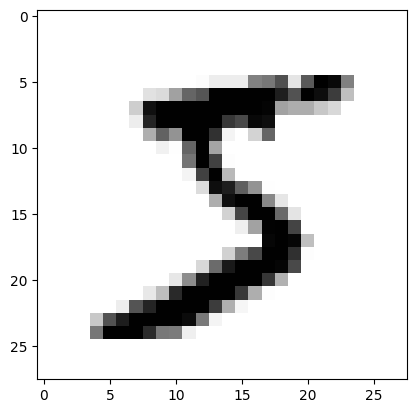

In [6]:
# 이미지 데이터 시각화
plt.imshow(X_train[0], cmap=plt.cm.binary)

### (2) 이미지 데이터 전처리
- 3차원 이미지를 2차원으로 변환
  - (60000, 28, 28)  -> (60000, 784) (샘플수, 피처수)  
  - 이유 : Dense 층의 입력값으로 사용 시 
    - 2차원 형태의 데이터 사용하지 못하고  
    - 1차원 형태로 변환해야 함
    - 가로,세로 (28, 28) - > (784, ) 또는 (28*28, )
    - input_shape(784,)  
- 정규화  
  - 이미지의 실제 픽셀 값 : 0~255 범위의 값  
  - 정규화 해서 0~1사이의 값으로 변환  
- 원-핫 인코딩
  - 0~9 숫자 레이블이 범주형이므로 원-핫 인코딩 수행  

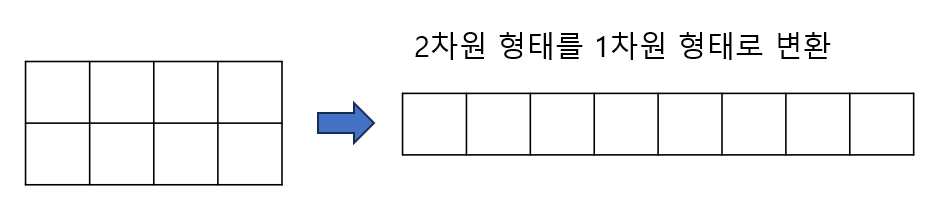

####  reshape / 정규화 (Normalization)

In [7]:
# 어차피 0 ~ 255사이의 값이니 255로 나누면 정규화 끗
X_train_prep = X_train.reshape(60000, 784)/255
X_test_prep = X_test.reshape(10000, 784)/255

#### 원-핫 인코딩 

In [8]:
from keras.utils import to_categorical

In [9]:
y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

In [10]:
y_train_prep[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  

In [11]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense

In [12]:
tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층  :입력 : 28*28=784, 출력 : 512
# 두 번째 층 : 입력 512, 출력 : 10
model = Sequential()
model.add(Dense(units=512, input_dim=784, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
# softmax : 다중 분류 
# 출력층 출력값 수 : 10

# (2) 컴파일 / 최적화는 rmsprop도 가능
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [13]:
# (3) 모델 학습 (실행) / 내역도 저장
history = model.fit(x=X_train_prep, y=y_train_prep,
                    epochs=10, batch_size=4, validation_data=(X_test_prep, y_test_prep))

Epoch 1/10
15000/15000 [==============================] - 12s 772us/step - loss: 0.2467 - accuracy: 0.9261 - val_loss: 0.1353 - val_accuracy: 0.9598
Epoch 2/10
15000/15000 [==============================] - 12s 776us/step - loss: 0.1178 - accuracy: 0.9643 - val_loss: 0.1008 - val_accuracy: 0.9700
Epoch 3/10
15000/15000 [==============================] - 12s 776us/step - loss: 0.0874 - accuracy: 0.9737 - val_loss: 0.1130 - val_accuracy: 0.9693
Epoch 4/10
15000/15000 [==============================] - 11s 764us/step - loss: 0.0702 - accuracy: 0.9788 - val_loss: 0.1104 - val_accuracy: 0.9701
Epoch 5/10
15000/15000 [==============================] - 12s 771us/step - loss: 0.0628 - accuracy: 0.9813 - val_loss: 0.1150 - val_accuracy: 0.9691
Epoch 6/10
15000/15000 [==============================] - 12s 767us/step - loss: 0.0546 - accuracy: 0.9839 - val_loss: 0.1187 - val_accuracy: 0.9703
Epoch 7/10
15000/15000 [==============================] - 11s 765us/step - loss: 0.0471 - accuracy: 0.9852

In [14]:
# (4) 모델 평가 (결과 출력)
model.evaluate(X_test_prep, y_test_prep)

313/313 [==============================] - 0s 497us/step - loss: 0.1187 - accuracy: 0.9766


[0.1187213733792305, 0.9765999913215637]

### 시각화

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

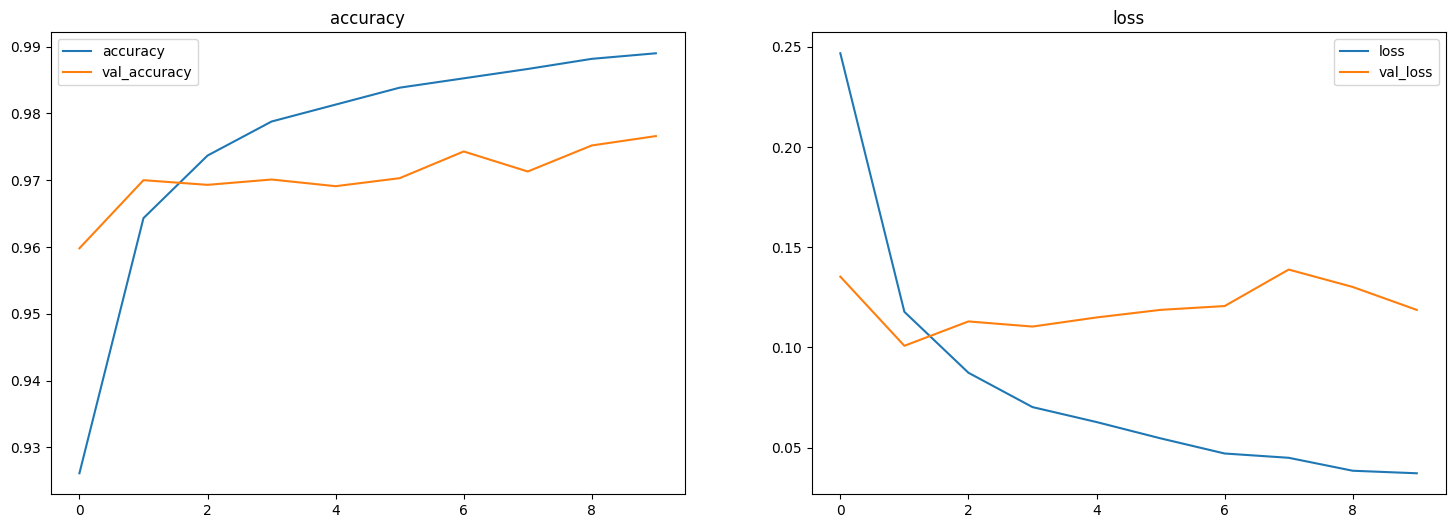

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### 모델 저장 

In [17]:
model.save('../data/img_model.keras')

### 모델 불러오기 

In [20]:
from keras.saving import load_model

In [21]:
loaded_model = load_model('../data/img_model.keras')

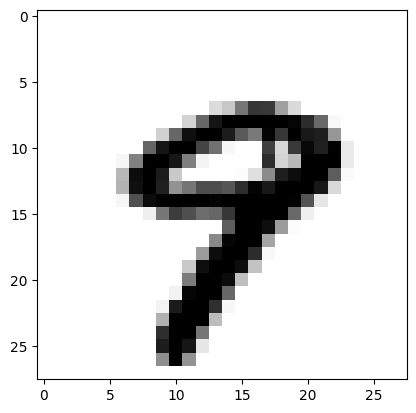

In [28]:
plt.imshow(X_test_prep[9].reshape(28, 28), cmap=plt.cm.binary)

In [29]:
loaded_model.predict(X_test_prep[9].reshape(1, 784))

1/1 [==============================] - 0s 13ms/step


array([[6.5236015e-12, 3.2767222e-15, 6.4121865e-14, 1.1882946e-08,
        1.6672939e-07, 1.7647833e-10, 1.9370873e-16, 7.1217222e-08,
        1.6313368e-09, 9.9999976e-01]], dtype=float32)